# 4. Correlation Studies: Is AI adoption linked to higher user engagement?

In [1]:
%pip install pandas matplotlib seaborn scikit-learn statsmodels


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


To analyze if AI adoption is linked to higher user engagement, you would likely want to use two different machine learning algorithms: Linear Regression (for its simplicity and interpretability) and Random Forest Regression (for its ability to handle complex, non-linear relationships).

Step-by-Step Plan:
1. Data Preprocessing
Ensure the dataset is cleaned and ready for modeling. Here's how you can handle the preprocessing steps:
- Handling Missing Data: If there are missing values, you could drop or impute the data. For numerical columns, use mean/median imputation, and for categorical columns, you can use the mode.

- Feature Engineering:
-- Normalization: If you use distance-based algorithms (e.g., Random Forest or XGBoost), it’s good to normalize numerical features (e.g., AI adoption rate, user engagement metrics).
-- One-Hot Encoding: For categorical variables like Country or Industry, you should apply One-Hot Encoding to convert them into numerical format.
-- Outlier Removal: Use IQR or Z-Score to handle extreme values that could distort trends.

2. Choose Suitable Algorithms
- Linear Regression: A simple method for predicting continuous variables like user engagement or AI adoption rate. It assumes a linear relationship between predictors (e.g., AI adoption) and outcomes (e.g., user engagement).
-- Justification: It's easy to interpret and works well when the relationship is linear.

- Random Forest Regression: A more complex, non-linear algorithm that uses multiple decision trees to make predictions. This method can capture intricate relationships between features like AI adoption and user engagement, making it suitable when there are interactions or non-linear patterns.
-- Justification: It can handle complex datasets, outliers, and non-linear relationships effectively.

Non-numeric columns: Index(['Country', 'Industry', 'Top AI Tools Used', 'Regulation Status'], dtype='object')
NaN values in the dataset: 0
NaN values in X_train: 0
NaN values in y_train: 0
Linear Regression - MAE: 15.674260452396169, R²: -0.5596068965522183
Random Forest - MAE: 14.41377, R²: -0.14886060262096223


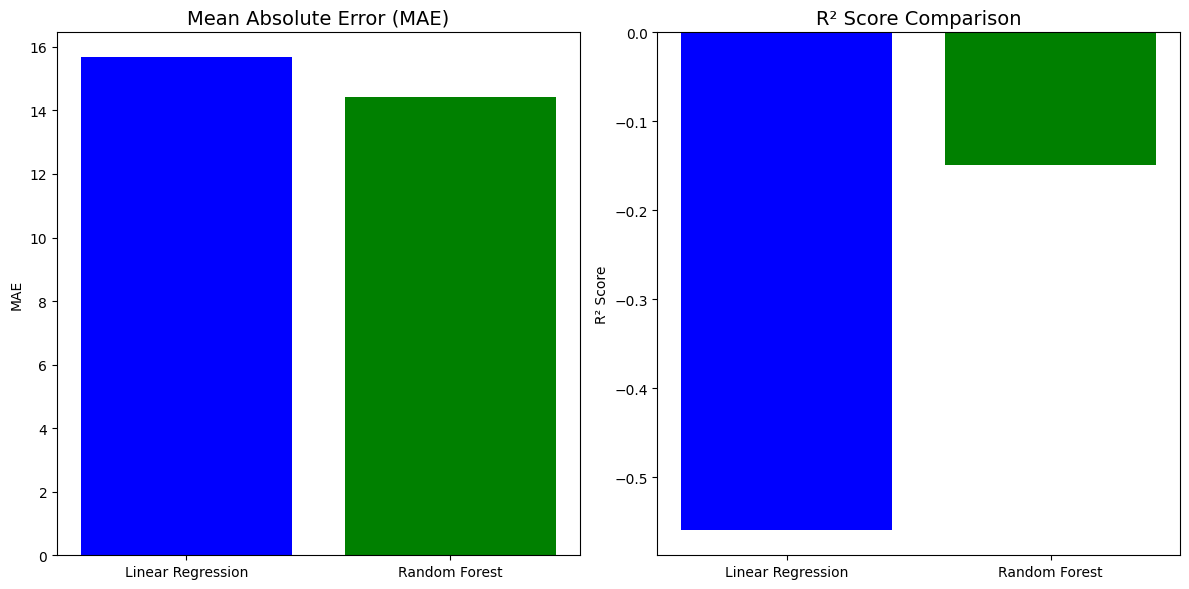

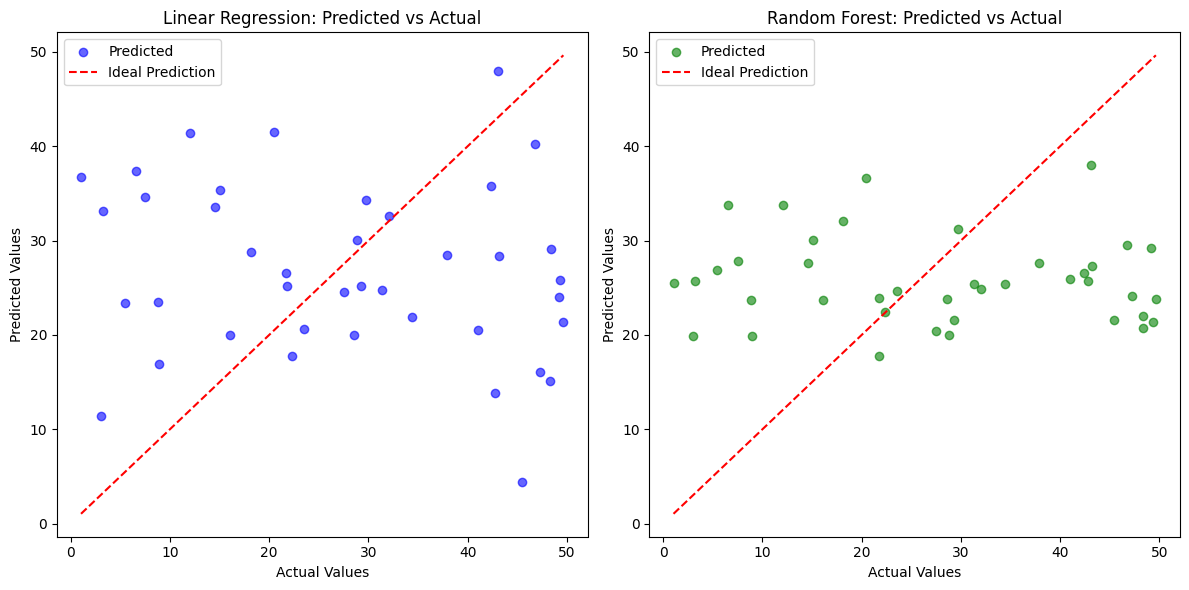

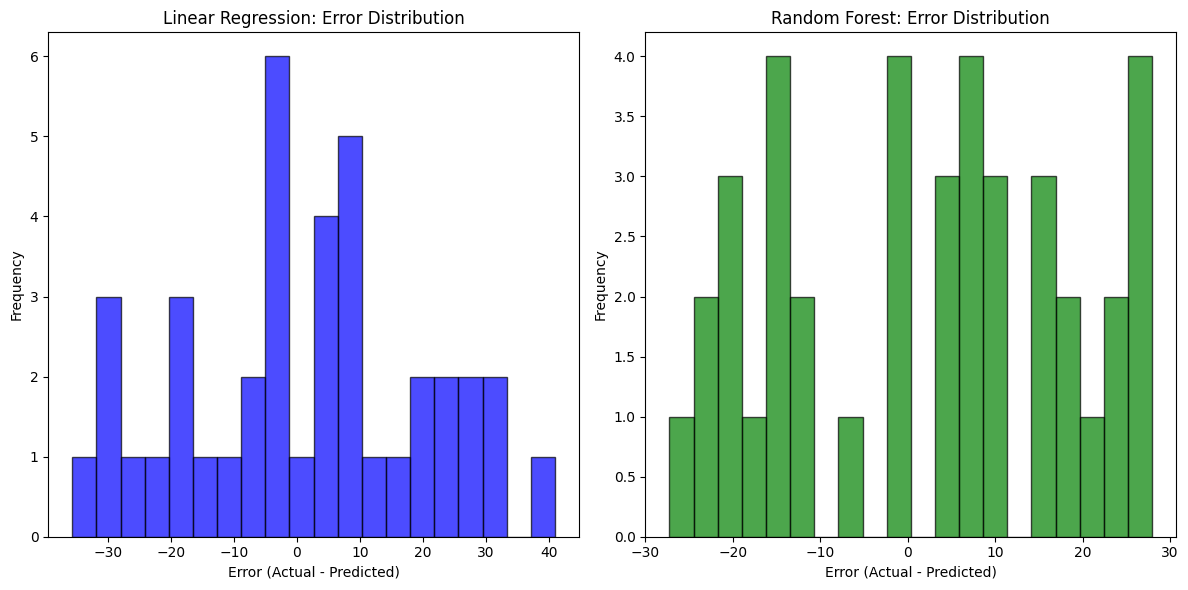

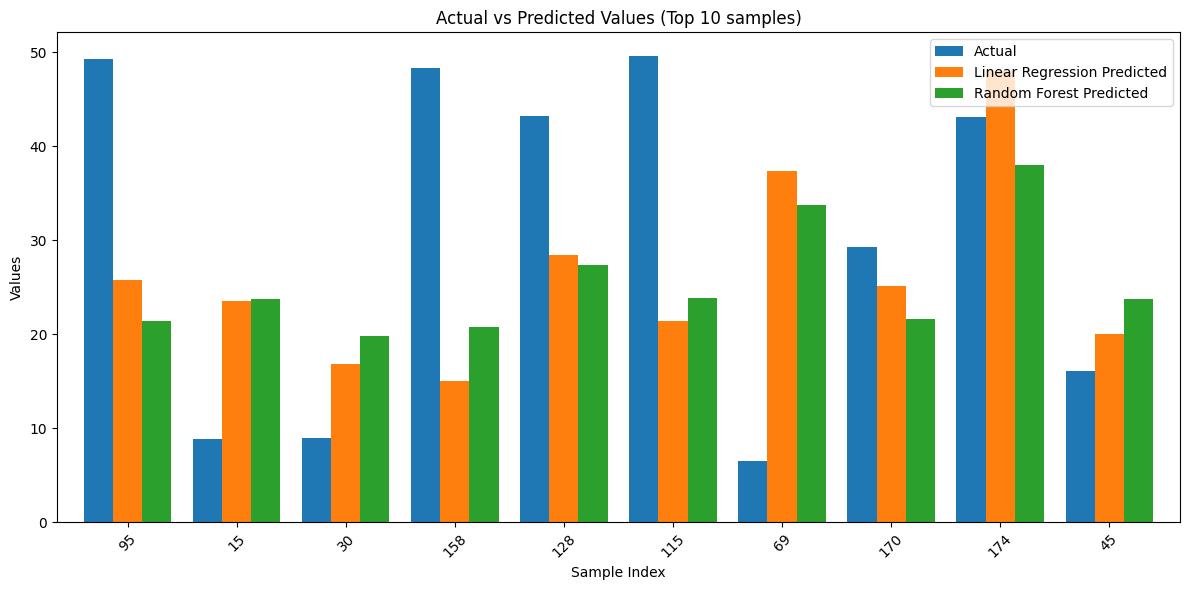

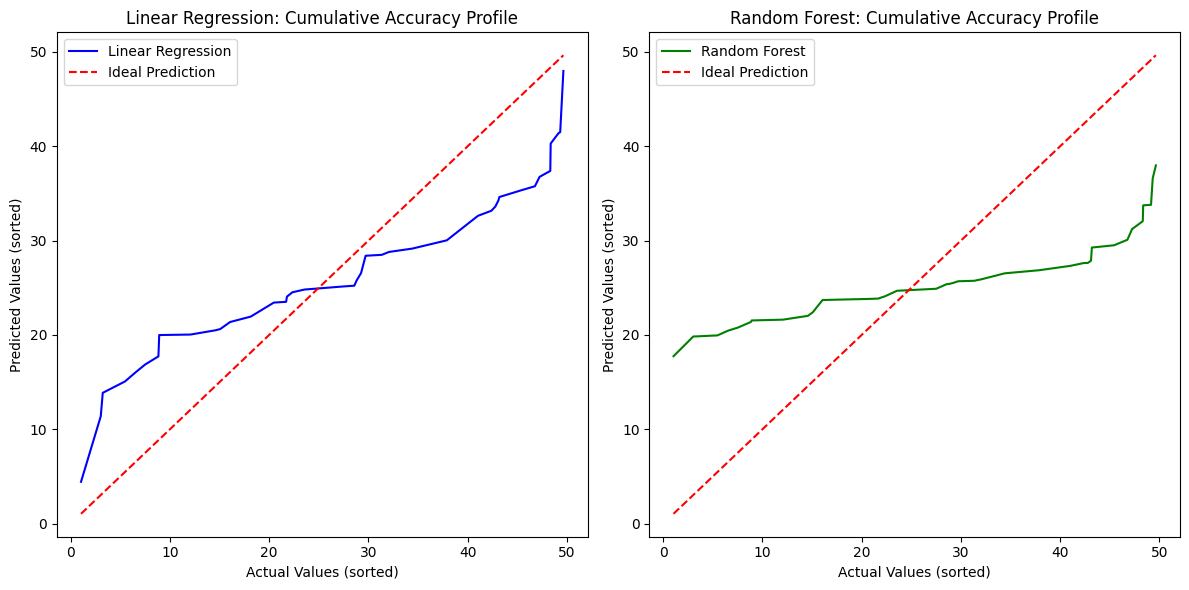

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np


# Load the dataset
df = pd.read_csv('Global_AI_Content_Impact_Dataset.csv')  # Replace with your actual file path

# Check for non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns
print(f"Non-numeric columns: {non_numeric_columns}")

# Handle non-numeric columns using OneHotEncoding
# We will apply One-Hot Encoding to categorical columns
encoder = OneHotEncoder(sparse_output=False)
encoded_columns = encoder.fit_transform(df[non_numeric_columns])

# Add the encoded columns back to the dataframe
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(non_numeric_columns))
df = df.join(encoded_df)

# Drop original non-numeric columns after encoding
df = df.drop(columns=non_numeric_columns)

# Check for NaN values in the dataset
print(f"NaN values in the dataset: {df.isna().sum().sum()}")

# Handle missing data (drop rows with NaN values)
df = df.dropna()

# Normalize numerical features if necessary
scaler = StandardScaler()
numeric_columns = ['AI Adoption Rate (%)', 'AI-Generated Content Volume (TBs per year)', 
                   'Revenue Increase Due to AI (%)', 'Human-AI Collaboration Rate (%)', 
                   'Consumer Trust in AI (%)', 'Market Share of AI Companies (%)']

df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Define X (features) and y (target)
X = df.drop(columns=['Job Loss Due to AI (%)'])  # Features (independent variables)
y = df['Job Loss Due to AI (%)']  # Target (dependent variable)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for NaN values in the training set
print(f"NaN values in X_train: {X_train.isna().sum().sum()}")
print(f"NaN values in y_train: {y_train.isna().sum()}")

# If NaN values still exist, drop them again
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Align y_train with X_train after dropping NaNs

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_lr = linear_model.predict(X_test)

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Models
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the results
print(f"Linear Regression - MAE: {mae_lr}, R²: {r2_lr}")
print(f"Random Forest - MAE: {mae_rf}, R²: {r2_rf}")

# Visualization: Comparing MAE and R² Score
labels = ['Linear Regression', 'Random Forest']
mae_values = [mae_lr, mae_rf]
r2_values = [r2_lr, r2_rf]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot for MAE
ax[0].bar(labels, mae_values, color=['blue', 'green'])
ax[0].set_title('Mean Absolute Error (MAE)', fontsize=14)
ax[0].set_ylabel('MAE')

# Plot for R² Score
ax[1].bar(labels, r2_values, color=['blue', 'green'])
ax[1].set_title('R² Score Comparison', fontsize=14)
ax[1].set_ylabel('R² Score')

plt.tight_layout()
plt.show()


# Scatter plot for Linear Regression Predictions vs Actual Values
plt.figure(figsize=(12, 6))

# Linear Regression Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Prediction')
plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Random Forest Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Prediction')
plt.title('Random Forest: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.tight_layout()
plt.show()


# Error Distribution Plot
plt.figure(figsize=(12, 6))

# Linear Regression Error Distribution
plt.subplot(1, 2, 1)
errors_lr = y_test - y_pred_lr
plt.hist(errors_lr, bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title('Linear Regression: Error Distribution')
plt.xlabel('Error (Actual - Predicted)')
plt.ylabel('Frequency')

# Random Forest Error Distribution
plt.subplot(1, 2, 2)
errors_rf = y_test - y_pred_rf
plt.hist(errors_rf, bins=20, color='green', edgecolor='black', alpha=0.7)
plt.title('Random Forest: Error Distribution')
plt.xlabel('Error (Actual - Predicted)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Actual vs Predicted Bar Chart
df_comparison = pd.DataFrame({'Actual': y_test, 'Linear Regression Predicted': y_pred_lr, 'Random Forest Predicted': y_pred_rf})
df_comparison = df_comparison.head(10)  # Show the top 10 predictions for clarity

df_comparison.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Actual vs Predicted Values (Top 10 samples)')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Cumulative Accuracy Profile for Linear Regression
plt.figure(figsize=(12, 6))

# Linear Regression CAP Curve
plt.subplot(1, 2, 1)
plt.plot(np.sort(y_test), np.sort(y_pred_lr), label='Linear Regression', color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Prediction')
plt.title('Linear Regression: Cumulative Accuracy Profile')
plt.xlabel('Actual Values (sorted)')
plt.ylabel('Predicted Values (sorted)')
plt.legend()

# Random Forest CAP Curve
plt.subplot(1, 2, 2)
plt.plot(np.sort(y_test), np.sort(y_pred_rf), label='Random Forest', color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Prediction')
plt.title('Random Forest: Cumulative Accuracy Profile')
plt.xlabel('Actual Values (sorted)')
plt.ylabel('Predicted Values (sorted)')
plt.legend()

plt.tight_layout()
plt.show()


